In [2]:
#######################################################
# Graficos para explorar dados da tempestade de vento #
# Versão-4                                            #
#-----------------------------------------------------# 
# Info: Dados do segundo capitulo da minha tese de    #
# doutorado...degradação florestal causada por quebra #
# de arvores durante tempestade de vento.             #
# Eduardo Q Marques                                   #
# eduardobio2009@gmail.com                            #
#-----------------------------------------------------#
# Ambiente Python                                     #
# 04 de abril de 2019                                 #
#######################################################

In [3]:
#Importa o panda,o  pyplot do matplotlib e o numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Chama e da nome a planilha
storm_data=pd.read_csv("C:/Users/Eduardo Q Marques/Documents/My Jobs/Doutorado/Capitulo2/Campo vento/storm_data_full_B.csv")
#storm_data

In [4]:
#Salva o grafico altura da cicatriz
plt.hist(storm_data.alt_cic)
plt.ylabel('Numbers of trees')
plt.xlabel('height (m)')
plt.title('Scar height')
plt.yscale('linear')
plt.savefig('storm_cic.png',dpi=300)
plt.close()

#Salva o grafico altura da quebra
plt.hist(storm_data.altura_quebra)
plt.ylabel('Numbers of trees')
plt.xlabel('height (m)')
plt.title('Break height')
plt.yscale('linear')
plt.savefig('storm_quebra.png',dpi=300)
plt.close()

#Salva o grafico direcao do vento
plt.hist(storm_data.direcao)
plt.ylabel('Numbers of trees')
plt.xlabel('degree (North)')
plt.title('Fall direction')
plt.yscale('linear')
plt.savefig('storm_dir.png',dpi=300)
plt.close()

c:\users\eduardo q marques\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\eduardo q marques\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [5]:
#Mudar nome das variaveis do tipo de dano (q,r,c)
#Criar dicionario
new_names = {'tipo_de_dano':{
    'q':'Snapped',
    'r':'Uprooted',
    'c':'Crown damage'
    }}

#Trocar nome na planilha
storm_data.replace(new_names, inplace=True)

#Count das categorias (Para dados categoricos ex: quebrada, copa, raiz)
tipo_dano = storm_data['tipo_de_dano'].value_counts()

#Separar os dados de tipo de dano por plot
tipo_dano_a = storm_data[storm_data['parcela']=='a']['tipo_de_dano'].value_counts()
                         
tipo_dano_b = storm_data[storm_data['parcela']=='b' ]['tipo_de_dano'].value_counts()
                        
tipo_dano_c = storm_data[storm_data['parcela']=='c'] ['tipo_de_dano'].value_counts()

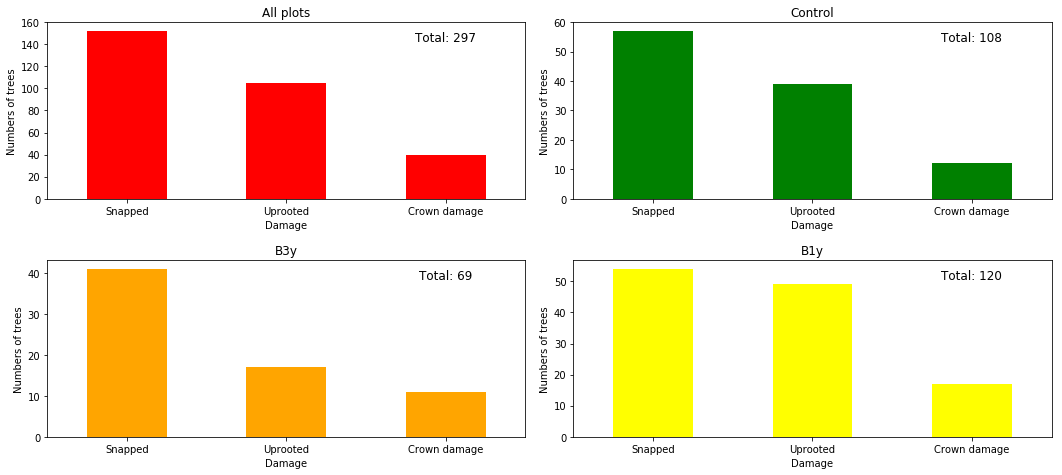

In [6]:
#Salva do tipo de dano para todos os plots
plt.figure(figsize=(18, 12))

plt.subplot(321)
tipo_dano.plot.bar(color = ['r'])
plt.text(2, tipo_dano.max(), f'Total: {tipo_dano.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('All plots')
plt.xticks(rotation='0')
# plt.savefig('storm_dano_total.png',dpi=300)
# plt.close()

#Salva do tipo de dano para o plot A
plt.subplot(322)
tipo_dano_a.plot.bar(color = ['green','green','green'])
plt.text(2, tipo_dano_a.max(), f'Total: {tipo_dano_a.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Control')
plt.xticks(rotation='0')
# plt.savefig('storm_dano_a.png',dpi=300)
# plt.close()

#Salva do tipo de dano para o plot B
plt.subplot(323)
tipo_dano_b.plot.bar(color = ['orange','orange','orange'])
plt.text(2, tipo_dano_b.max(), f'Total: {tipo_dano_b.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('B3y')
plt.xticks(rotation='0')
# plt.savefig('storm_dano_b.png',dpi=300)
# plt.close()

#Salva do tipo de dano para o plot C
plt.subplot(324)
tipo_dano_c.plot.bar(color = ['yellow','yellow','yellow'])
plt.text(2, tipo_dano_c.max(), f'Total: {tipo_dano_c.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('B1y')
plt.xticks(rotation='0')
plt.subplots_adjust(hspace=0.35,
                    wspace=0.1)

plt.savefig('storm_dano_all.png',dpi=300)

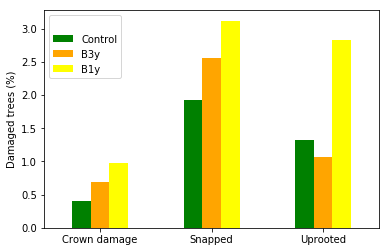

In [6]:
#Cria funcoao para pegar dados por parcela e plotar a porcentagem em relação ao total de arvores inventariadas
def get_by_parcela(name):
    parcelas = {'c':'B1y',
    'b':'B3y',
    'a':'Control'}
    df = storm_data[storm_data['parcela']==name]['tipo_de_dano'].value_counts()
    df['area'] = parcelas[name]
    return df

def json_d(df):
    return {
            'Snapped':df['Snapped'],
            'Uprooted':df['Uprooted'],
            'Crown damage':df['Crown damage'],
            ' ':df['area']
        }

parcelas = ['a','b','c']


all_data =[json_d(x) for x in [get_by_parcela(y) for y in parcelas ]]
df_all = pd.DataFrame(all_data)
df_all=df_all.set_index(' ')
df_all=df_all.T
df_all.Control = df_all.Control*100/2955 #formula para relação ao total de arvores inventariadas (plotA)
df_all.B3y = df_all.B3y*100/1603 #formula para relação ao total de arvores inventariadas (plotB)
df_all.B1y = df_all.B1y*100/1731 #formula para relação ao total de arvores inventariadas (plotC)
df_all.plot.bar(color = ['green','orange','yellow'])
plt.ylabel('Damaged trees (%)')
plt.xticks(rotation='0')
plt.savefig('storm_dano_plot',dpi=300)

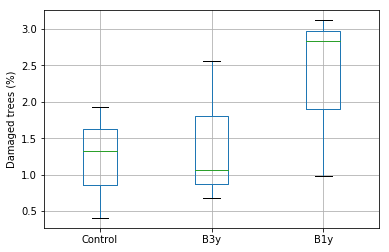

In [8]:
#Boxplot dos dados
df_all.boxplot()
plt.ylabel('Damaged trees (%)')
plt.savefig('storm_hist.png',dpi=300)

In [42]:
#Dano por espécie

#Count das espécies
sp = storm_data['nomecomum'].value_counts()

#Separar os dados de tipo de dano por plot
sp_a = storm_data[storm_data['parcela']=='a']['nomecomum'].value_counts()
                         
sp_b = storm_data[storm_data['parcela']=='b' ]['nomecomum'].value_counts()
                        
sp_c = storm_data[storm_data['parcela']=='c'] ['nomecomum'].value_counts()

#Salva do tipo de dano para todos os plots
sp[0:4].plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Species of trees')
plt.title('Trees')
plt.xticks(rotation='0')
plt.savefig('especies_total.png',dpi=300)
plt.close()

#Salva do tipo de dano para o plot A
sp_a[0:4].plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Species of trees')
plt.title('Trees (Control)')
plt.xticks(rotation='0')
plt.savefig('especies_a.png',dpi=300)
plt.close()

#Salva do tipo de dano para o plot B
sp_b[0:4].plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Species of trees')
plt.title('Trees (B3y)')
plt.xticks(rotation='0')
plt.savefig('especies_b.png',dpi=300)
plt.close()

#Salva do tipo de dano para o plot C
sp_c[0:4].plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Species of trees')
plt.title('Trees (B1y)')
plt.xticks(rotation='0')
plt.savefig('especies_c.png',dpi=300)
plt.close()

c:\users\eduardo q marques\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


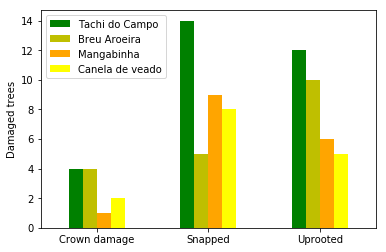

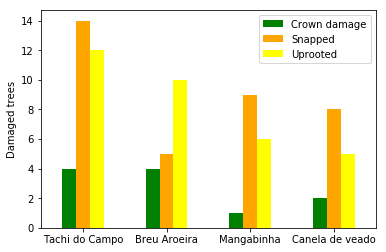

In [41]:
#Epecies mais afetadas por tipo de danos
#Contando os tipos de dano por especie
tachi = storm_data[storm_data['nomecomum']=='tachi_do_campo']['tipo_de_dano'].value_counts()
aroeira = storm_data[storm_data['nomecomum']=='breu_aroeira']['tipo_de_dano'].value_counts()
mangabinha = storm_data[storm_data['nomecomum']=='mangabinha']['tipo_de_dano'].value_counts()
canela = storm_data[storm_data['nomecomum']=='canela_de_veado']['tipo_de_dano'].value_counts()

#Criando dataframe para o grafico
sp_dano = pd.concat([tachi, aroeira, mangabinha, canela], axis=1) 
sp_dano.columns = ['Tachi do Campo', 'Breu Aroeira', 'Mangabinha', 'Canela de veado']

#Grafico
#Especies por tipo de dano
sp_dano.plot.bar(color = ['green','y','orange','yellow'])
plt.ylabel('Damaged trees')
plt.xticks(rotation='0')
plt.savefig('storm_dano_especie',dpi=300)

#Dano pelo tipo de especie
sp_dano=sp_dano.T
sp_dano.plot.bar(color = ['green','orange','yellow'])
plt.ylabel('Damaged trees')
plt.xticks(rotation='0')
plt.savefig('storm_dano_especie_b',dpi=300)